In [86]:
!pip install sklearn

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
import matplotlib.pyplot as plt                       
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans , AgglomerativeClustering , DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [88]:
df = pd.read_csv("c:/SL LAB 5/Live.csv")

In [89]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


# 1.Valide si la columna status_id vale la pena mantenerla en el dataset 

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [91]:
headers = ['status_id','status_type','status_published','num_reactions','num_comments',
          'num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys','1','2','3','4'
]

In [92]:
header = ['status_type','num_reactions','num_comments',
          'num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys'
]

In [93]:
train = pd.read_csv("c:/SL LAB 5/Live.csv", header=None,names= headers)
# test = pandas.read_csv("adult.test.csv", header=None , names = header , index_col=False , na_values="?" , skipinitialspace=True)
# dataset = pandas.concat([train,test])
AutoMpg_data = pd.concat([train])
AutoMpg_data.drop(labels=["1", "2", "3", "4",'status_id','status_published'], axis = 1, inplace = True)
AutoMpg_data.info()
for col in header:
    print ("values of %s"%(col))
    print (AutoMpg_data[col].value_counts())
    print (AutoMpg_data[col].count())
    print ('////////////////////////////\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7051 entries, 0 to 7050
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7051 non-null   object
 1   num_reactions  7051 non-null   object
 2   num_comments   7051 non-null   object
 3   num_shares     7051 non-null   object
 4   num_likes      7051 non-null   object
 5   num_loves      7051 non-null   object
 6   num_wows       7051 non-null   object
 7   num_hahas      7051 non-null   object
 8   num_sads       7051 non-null   object
 9   num_angrys     7051 non-null   object
dtypes: object(10)
memory usage: 551.0+ KB
values of status_type
photo          4288
video          2334
status          365
link             63
status_type       1
Name: status_type, dtype: int64
7051
////////////////////////////

values of num_reactions
1       131
2       124
14      121
0       121
3       116
       ... 
2826      1
2032      1
2154      1
1997      1
4

In [63]:
plt.rcParams['figure.figsize'] = (18, 7)

Text(0, 0.5, 'count')

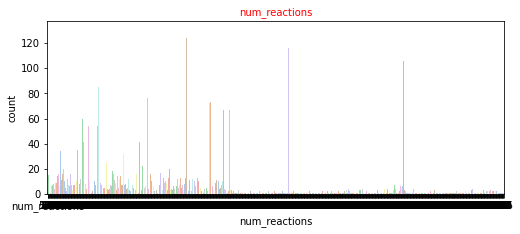

In [95]:
plt.subplot(2, 2, 1)
sns.countplot(AutoMpg_data['num_reactions'], palette = 'pastel')
plt.title('num_reactions', fontsize = 10,color='red')
plt.xlabel('num_reactions', fontsize = 10)
plt.ylabel('count', fontsize = 10)

Text(0, 0.5, 'count')

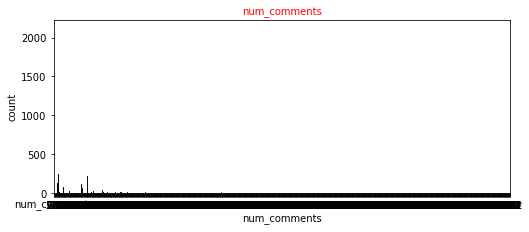

In [96]:
# checking the Distribution of customers on Weekend
plt.subplot(2, 2, 2)
sns.countplot(AutoMpg_data['num_comments'], palette = 'inferno')
plt.title('num_comments', fontsize = 10,color='red')
plt.xlabel('num_comments', fontsize = 10)
plt.ylabel('count', fontsize = 10)

Text(0, 0.5, 'count')

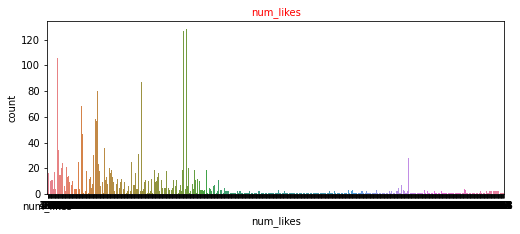

In [97]:
plt.subplot(2, 2, 3)
sns.countplot(AutoMpg_data['num_likes'], palette = 'husl')
plt.title('num_likes', fontsize = 10,color='red')
plt.xlabel('num_likes', fontsize = 10)
plt.ylabel('count', fontsize = 10)

Text(0, 0.5, 'count')

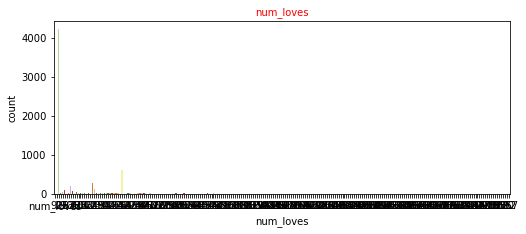

In [99]:
plt.subplot(2, 2, 4)
sns.countplot(AutoMpg_data['num_loves'], palette = 'Paired')
plt.title('num_loves', fontsize = 10,color='red')
plt.xlabel('num_loves', fontsize = 10)
plt.ylabel('count', fontsize = 10)


In [100]:
plt.show()

In [101]:
plt.rcParams['figure.figsize'] = (18, 7)

Text(0, 0.5, 'count')

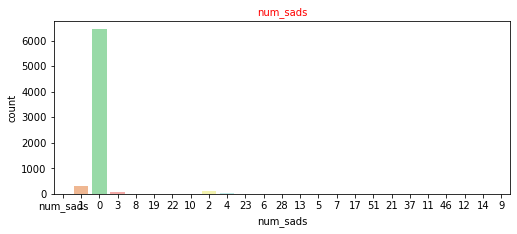

In [102]:
plt.subplot(2, 2, 1)
sns.countplot(AutoMpg_data['num_sads'], palette = 'pastel')
plt.title('num_sads', fontsize = 10,color='red')
plt.xlabel('num_sads', fontsize = 10)
plt.ylabel('count', fontsize = 10)


Text(0, 0.5, 'count')

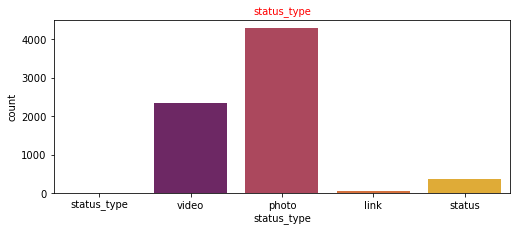

In [103]:
# checking the Distribution of customers on Weekend
plt.subplot(2, 2, 2)
sns.countplot(AutoMpg_data['status_type'], palette = 'inferno')
plt.title('status_type', fontsize = 10,color='red')
plt.xlabel('status_type', fontsize = 10)
plt.ylabel('count', fontsize = 10)

Text(0, 0.5, 'count')

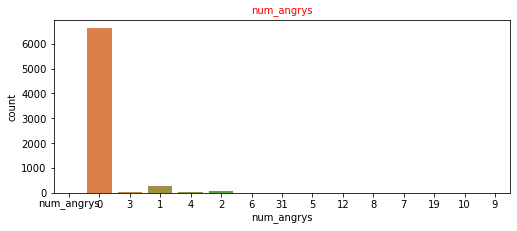

In [104]:
plt.subplot(2, 2, 3)
sns.countplot(AutoMpg_data['num_angrys'], palette = 'husl')
plt.title('num_angrys', fontsize = 10,color='red')
plt.xlabel('num_angrys', fontsize = 10)
plt.ylabel('count', fontsize = 10)

Text(0, 0.5, 'count')

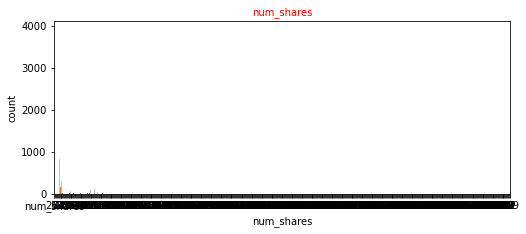

In [105]:
plt.subplot(2, 2, 4)
sns.countplot(AutoMpg_data['num_shares'], palette = 'Paired')
plt.title('num_shares', fontsize = 10,color='red')
plt.xlabel('num_shares', fontsize = 10)
plt.ylabel('count', fontsize = 10)


In [106]:
plt.show()

In [107]:
plt.rcParams['figure.figsize'] = (18, 7)


Text(0, 0.5, 'count')

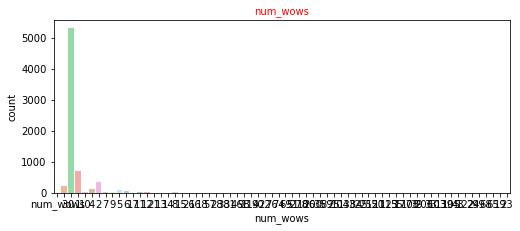

In [108]:
plt.subplot(2, 2, 1)
sns.countplot(AutoMpg_data['num_wows'], palette = 'pastel')
plt.title('num_wows', fontsize = 10,color='red')
plt.xlabel('num_wows', fontsize = 10)
plt.ylabel('count', fontsize = 10)

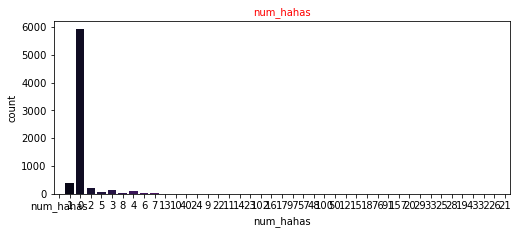

In [109]:
# checking the Distribution of customers on Weekend
plt.subplot(2, 2, 2)
sns.countplot(AutoMpg_data['num_hahas'], palette = 'inferno')
plt.title('num_hahas', fontsize = 10,color='red')
plt.xlabel('num_hahas', fontsize = 10)
plt.ylabel('count', fontsize = 10)
AutoMpg_data['status_type'] = AutoMpg_data['status_type'].map({ 'photo':0, 'video':1,'status':2,'link':3})
plt.show()


In [110]:
# AutoMpg_data.drop(labels=["num_likes", "num_shares"], axis = 1, inplace = True)
print(len(AutoMpg_data.columns))
AutoMpg_data = AutoMpg_data.drop(AutoMpg_data.columns[8], axis=1)
print (AutoMpg_data.info())
# print(AutoMpg_data[0].describe())

10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7051 entries, 0 to 7050
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   status_type    7050 non-null   float64
 1   num_reactions  7051 non-null   object 
 2   num_comments   7051 non-null   object 
 3   num_shares     7051 non-null   object 
 4   num_likes      7051 non-null   object 
 5   num_loves      7051 non-null   object 
 6   num_wows       7051 non-null   object 
 7   num_hahas      7051 non-null   object 
 8   num_angrys     7051 non-null   object 
dtypes: float64(1), object(8)
memory usage: 495.9+ KB
None


In [112]:
df = pd.DataFrame(np.random.randn(100, 2))
pca = sklearnPCA(n_components=2)
AutoMpg_data = pd.DataFrame(pca.fit_transform(AutoMpg_data))
plt.scatter(AutoMpg_data[0], AutoMpg_data[1])
plt.show()
Sum_of_squared_distances = []
K = range(1,15)
mms = MinMaxScaler()
mms.fit(AutoMpg_data)
data_transformed = mms.transform(AutoMpg_data)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
N = 7
kmeans = KMeans(n_clusters=N, random_state=1).fit(AutoMpg_data)
highrachial = AgglomerativeClustering(n_clusters=N).fit(AutoMpg_data)
db=DBSCAN(eps=84,min_samples=1).fit(AutoMpg_data)
inertia = kmeans.inertia_
print("inertia kmeans:",inertia)

ValueError: could not convert string to float: 'num_reactions'

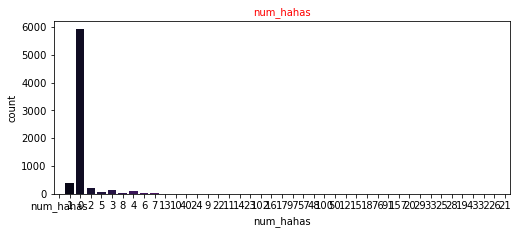

9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7051 entries, 0 to 7050
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   status_type    0 non-null      float64
 1   num_reactions  7051 non-null   object 
 2   num_comments   7051 non-null   object 
 3   num_shares     7051 non-null   object 
 4   num_likes      7051 non-null   object 
 5   num_loves      7051 non-null   object 
 6   num_wows       7051 non-null   object 
 7   num_hahas      7051 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.8+ KB
None


ValueError: could not convert string to float: 'num_reactions'

In [113]:
# checking the Distribution of customers on Weekend
plt.subplot(2, 2, 2)
sns.countplot(AutoMpg_data['num_hahas'], palette = 'inferno')
plt.title('num_hahas', fontsize = 10,color='red')
plt.xlabel('num_hahas', fontsize = 10)
plt.ylabel('count', fontsize = 10)
AutoMpg_data['status_type'] = AutoMpg_data['status_type'].map({ 'photo':0, 'video':1,'status':2,'link':3})
plt.show()

# AutoMpg_data.drop(labels=["num_likes", "num_shares"], axis = 1, inplace = True)
print(len(AutoMpg_data.columns))
AutoMpg_data = AutoMpg_data.drop(AutoMpg_data.columns[8], axis=1)
print (AutoMpg_data.info())
# print(AutoMpg_data[0].describe())

df = pd.DataFrame(np.random.randn(100, 2))
pca = sklearnPCA(n_components=2)
AutoMpg_data = pd.DataFrame(pca.fit_transform(AutoMpg_data))
plt.scatter(AutoMpg_data[0], AutoMpg_data[1])
plt.show()
Sum_of_squared_distances = []
K = range(1,15)
mms = MinMaxScaler()
mms.fit(AutoMpg_data)
data_transformed = mms.transform(AutoMpg_data)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
N = 7
kmeans = KMeans(n_clusters=N, random_state=1).fit(AutoMpg_data)
highrachial = AgglomerativeClustering(n_clusters=N).fit(AutoMpg_data)
db=DBSCAN(eps=84,min_samples=1).fit(AutoMpg_data)
inertia = kmeans.inertia_
print("inertia kmeans:",inertia)

In [114]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(AutoMpg_data)
distances, indices = nbrs.kneighbors(AutoMpg_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

ValueError: could not convert string to float: 'num_reactions'

In [115]:
plt.figure(1)
plt.scatter(AutoMpg_data[0], AutoMpg_data[1], c=kmeans.labels_, cmap='viridis' , )
plt.suptitle("KMeans")
plt.show()
plt.figure(2)
plt.suptitle("Highrachial")
plt.scatter(AutoMpg_data[0], AutoMpg_data[1], c=highrachial.labels_, cmap='viridis')
plt.show()
plt.figure(3)
plt.suptitle("DBScan")
plt.scatter(AutoMpg_data[0], AutoMpg_data[1], c=db.labels_, cmap='viridis')
plt.show()

KeyError: 0

<Figure size 1296x504 with 0 Axes>